In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from scipy.stats import johnsonsb, skewnorm, dgamma, genlogistic, dweibull, johnsonsu


In [92]:
power_plants = pd.read_csv('../../../elecsim/data/processed/power_plants/uk_power_plants/uk_power_plants.csv')
power_plants

,Unnamed: 0,Unnamed: 0.1,Company,Name,Fuel,Capacity,Start_date,Simplified_Type
0,0,0,AES,Ballylumford B,Gas,540.0,1968.0,Recip_gas
1,1,1,AES,Ballylumford B OCGT,Gas oil,116.0,1968.0,Recip_diesel
2,2,2,AES,Ballylumford C,CCGT,616.0,2003.0,CCGT
3,3,3,AES,Kilroot OCGT,Gas oil,142.0,1981.0,Recip_diesel
4,4,4,AES,Kilroot,Coal,560.0,1981.0,Coal
...,...,...,...,...,...,...,...,...
1080,1088,1088,WPO,Workington (Voridian),Wind,4.0,2006.0,Onshore
1081,1089,1089,WPO,Wythegill,Wind,1.5,2015.0,Onshore
1082,1090,1090,WPO,Ysgellog,Wind,4.6,2013.0,Onshore
1083,1091,1091,Xceco,Inner Dowsing,Wind (offshore),97.2,2009.0,Offshore


In [93]:
company_capacities = power_plants.groupby("Company").Capacity.sum().to_frame().reset_index()
company_capacities.sort_values("Capacity", ascending=False)

,Company,Capacity
10,EDF Energy,14763.0
37,RWE Generation SE,8664.0
42,SSE,8390.7
54,Uniper UK Limited,6605.0
46,Scottish power,4471.5
8,Drax Power Ltd,4035.0
34,Orsted,2738.7
18,Engie,2675.0
26,Intergen,2490.0
13,EPUKi,2270.0


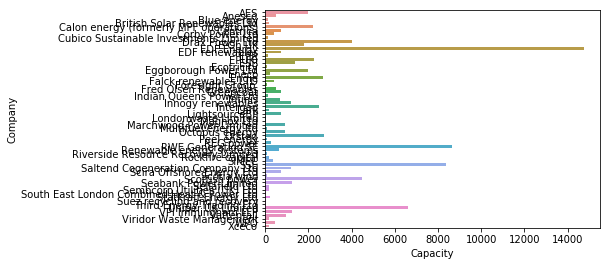

In [94]:
sns.barplot(data=company_capacities, y='Company', x="Capacity")

In [95]:
company_num_plants = power_plants.groupby("Company").Name.count().to_frame().reset_index()
company_num_plants.sort_values("Name", ascending=False)

,Company,Name
42,SSE,130
33,Octopus energy,121
28,LightsourceBP,100
1,Anesco,95
22,Greencoat,57
46,Scottish power,49
25,Innogy renewables,44
38,Renewable energy systems,38
58,WPO,37
9,E.On UK,36


In [96]:
company_stats = company_num_plants.merge(company_capacities, on="Company").sort_values("Capacity", ascending=False)
company_stats.head()

,Company,Name,Capacity
10,EDF Energy,14,14763.0
37,RWE Generation SE,11,8664.0
42,SSE,130,8390.7
54,Uniper UK Limited,9,6605.0
46,Scottish power,49,4471.5


In [97]:
company_stats['proportion'] = company_stats.Capacity/company_stats.Capacity.sum()*100
company_stats.to_csv("../data/company_list/company_stats.csv")


In [98]:
big_six = company_stats.head(6)
big_six
big_six['Company'] = "\"" + big_six['Company'] + "\","
big_six['Company'].cumsum().values.tolist()

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['"EDF Energy",',
 '"EDF Energy","RWE Generation SE",',
 '"EDF Energy","RWE Generation SE","SSE",',
 '"EDF Energy","RWE Generation SE","SSE","Uniper UK Limited",',
 '"EDF Energy","RWE Generation SE","SSE","Uniper UK Limited","Scottish power",',
 '"EDF Energy","RWE Generation SE","SSE","Uniper UK Limited","Scottish power","Drax Power Ltd",']

In [99]:
import pickle
from fitter import Fitter
import fitter
result_distributions_object = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/run/Compare_worlds/result_distributions_object.p", "rb"))

In [100]:
resultant_dist = '{}'

dist_class = eval(list(result_distributions_object[resultant_dist].fitted_param.keys())[0] + ".rvs")
dist_object = dist_class(*list(result_distributions_object[resultant_dist].fitted_param.values())[0], size=50000).tolist()
dist_object


[1635.2370070421548,
 4306.521860456449,
 -4113.809808536197,
 1079.614196220364,
 2017.389585872144,
 -4505.886366103189,
 899.6887974581261,
 1247.6649190042722,
 -388.89608141120937,
 -611.2610573050849,
 -2400.7835787779018,
 6042.826743058739,
 1142.5739099956068,
 682.1047166097562,
 1279.721917425642,
 570.5852026870645,
 -964.090288550947,
 4580.778537482926,
 5243.467866036401,
 1476.7400804419751,
 980.7556029410221,
 1200.3523148030108,
 -577.782932859417,
 2920.7802594929003,
 6938.366287849136,
 -2061.498631165209,
 -72.74221515144373,
 -363.02277146971556,
 1875.554849909193,
 1230.5747503034024,
 -99.83586144071448,
 -2816.736603623141,
 -531.2432833133855,
 -440.2022408342406,
 -519.3052154270837,
 2394.91045947385,
 5545.019331961712,
 1842.0457064501009,
 1017.6601502568392,
 3403.406872048685,
 62.72107889800988,
 1013.9371108478057,
 2415.5108222111526,
 1759.3786475536676,
 518.3877208479038,
 -1984.8279549452654,
 2622.546453489926,
 226.4550078612485,
 -1206.2901